In [100]:
%matplotlib inline

from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=2)
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

In [101]:
#Load data
# Base directory for the data
base_directory = 'C:/Users/Zehao Liu/OneDrive - Imperial College London/Reseaerch/Tibials Anterior Fatigue Experiment/TA fatigue model setting experiment'

# List of individual names
individuals = ['Zehao03']  # Replace with actual names
#individuals = ['Zehao03','Shibo03','Seb','Qingyue','Ruohan','Zehaoleft','Kursad','Pengda','Reneira','Ting','Zeyuan','Shuchang','Zehao06','Ming']#,'Lucas','Boxiao','Yixing','Quan']
# File suffixes for each type of data
pmmg_suffix = 'pmmg_mean_normalized_time.csv'
mmmg_rms_suffix = 'mmmg_rms_normalized_time.csv'
mmmg_force_suffix = 'mmg_rms_original_meanforce_withforce.csv'
pmmg_force_suffix = 'pmmg_mean_normalized_meanforce_withforce.csv'
force_suffix = 'force_mean_normalized_time.csv'

In [102]:
#Function cell
# Function for the fitting model (e.g., linear)
# Curve fitting models
def linear_model(x, a, b):
    return a * x + b

def polynomial_model_2nd(x, a, b, c):
    return a * x**2 + b * x + c

def polynomial_model_3rd(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exponential_model_double(x, a, b, c, d, e, f):
    return a * np.exp(b * (-x))  +  c * np.exp(d * (-x)) + e + e * np.exp(f * (-x)) 

def logarithmic_model(x, a, b, c):
    return a * np.log(b * x + c)

def exponential_model_single(x, a, b, c, d, e, f):
    return a * np.exp(b * (-x+d)) + c

def exponential_model_1th(x, a, b, c, d, e, f):
    return a * np.exp(b * (-x)) + d

def moving_average(data, window_size):
    """
    Calculate the moving average of a 1D ndarray.
    
    Parameters:
        data (ndarray): The input 1D array.
        window_size (int): The size of the moving window.
        
    Returns:
        ndarray: The moving average of the input data.
    """
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anacond

[0.61605534 0.04452863 0.28641432 0.56763064 0.04846796 0.00000003]


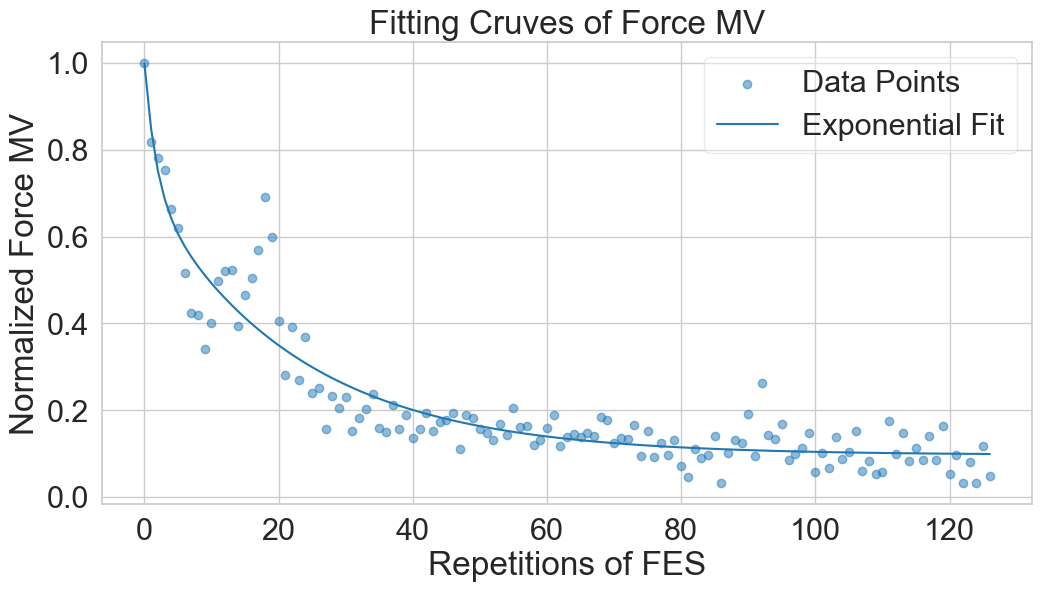

In [103]:
# Fit and plot data for each individual
#plt.figure(figsize=(12, 6))
for individual in individuals:
    plt.figure(figsize=(12, 6))
    file_path = os.path.join(base_directory, individual, force_suffix)
    df = pd.read_csv(file_path)
    time_values = df.index  # Use index as the x-axis
    force_values = df.iloc[:, 0]  # Assuming the force values are in the first column
    # Rescale force_values to the 0-1 range
    force_min = force_values.min()
    force_max = force_values.max()
    force_values = force_values / force_max 
    # Fit different models
    force_params_exp, _ = curve_fit(exponential_model_double, time_values, force_values, maxfev=10000)
    #tendon_params_exp,_ = curve_fit(exponential_model_double, time_values, force_values, maxfev=10000)
    
    np.set_printoptions(suppress = True)
    print(force_params_exp)

    # Plot data
    plt.scatter(time_values, force_values, label='Data Points', alpha=0.5)

    # Plot fitted lines
    plt.plot(time_values, exponential_model_double(time_values, *force_params_exp), label='Exponential Fit')
    
    # Adjust the legend's size and location
    plt.title('Fitting Cruves of Force MV')
    plt.xlabel('Repetitions of FES')
    plt.ylabel('Normalized Force MV')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
    plt.grid(True)
    plt.savefig('Different Fitting Cruves of Force MV.pdf', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.savefig('Different Fitting Cruves of Force MV.png', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.show()

c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anacond

[-0.36310064  0.0322728  -0.35701493  0.03227689  0.82242201  0.23948463]


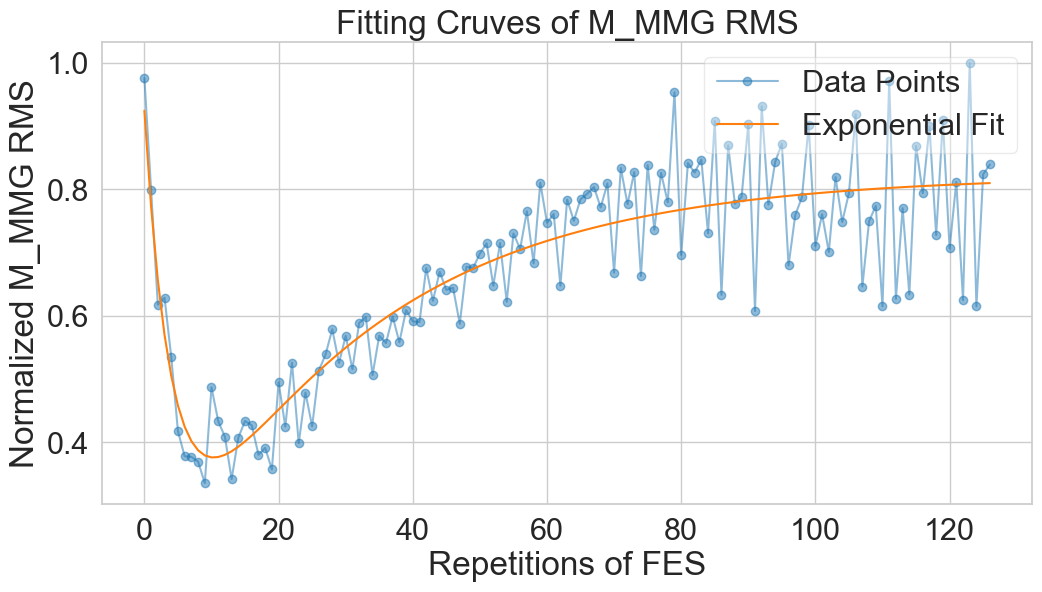

In [104]:
# Fit and plot data for each individual
#plt.figure(figsize=(12, 6))
for individual in individuals:
    plt.figure(figsize=(12, 6))
    file_path = os.path.join(base_directory, individual, mmmg_rms_suffix)
    df = pd.read_csv(file_path)
    time_values = df.index  # Use index as the x-axis
    mmmg_values = df.iloc[:, 0]  # Assuming the EMG values are in the first column
    # Rescale emg_values to the 0-1 range
    mmmg_min = mmmg_values.min()
    mmmg_max = mmmg_values.max()
    mmmg_values = mmmg_values / mmmg_max #* 248 / 113 * 9.8 
    # Fit different models
 
    mmmg_params_exp, _ = curve_fit(exponential_model_double, time_values, mmmg_values, maxfev=10000)
 
    np.set_printoptions(suppress = True)
    print(mmmg_params_exp)
    # Plot data
    plt.plot(time_values, mmmg_values, marker = 'o', linestyle = '-', label='Data Points', alpha=0.5)

    # Plot fitted lines
    plt.plot(time_values, exponential_model_double(time_values, *mmmg_params_exp), label='Exponential Fit')

    # Adjust the legend's size and location
    plt.title('Fitting Cruves of M_MMG RMS')
    plt.xlabel('Repetitions of FES')
    plt.ylabel('Normalized M_MMG RMS')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
    plt.grid(True)
    
    plt.savefig('Different Fitting Cruves of M_MMG RMS.png', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.show()

[99.24153216  6.8247462   1.          2.78705673  1.          1.        ]


C:\Users\Zehao Liu\AppData\Local\Temp\ipykernel_32744\3218457282.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  mmmg_force_exp_double, _ = curve_fit(exponential_model_1th, emg_values, force_values, maxfev=10000)


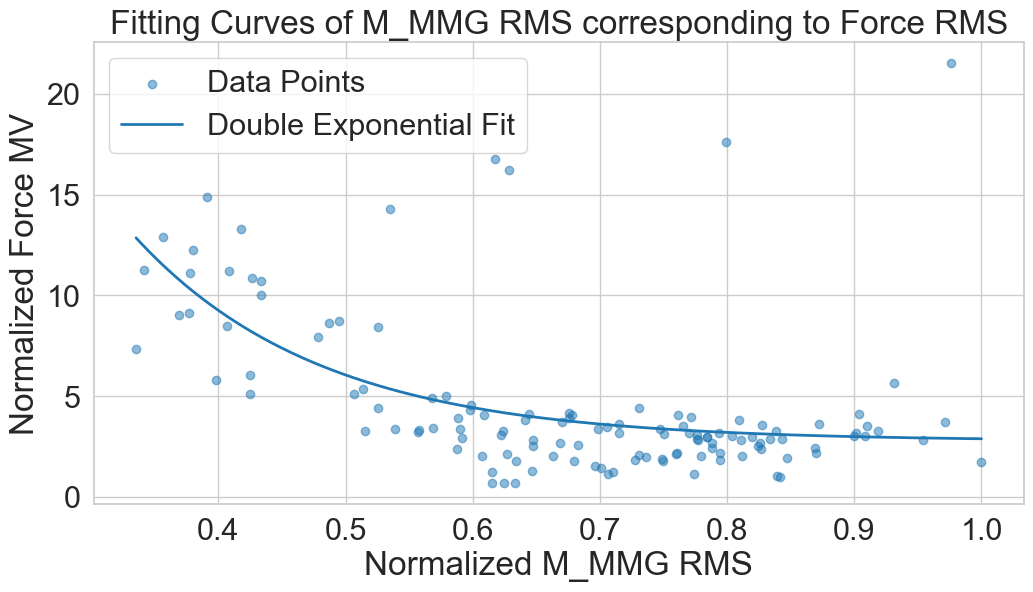

In [105]:
# Fit and plot data for each individual
for individual in individuals:
    plt.figure(figsize=(12, 6))

    file_path = os.path.join(base_directory, individual, mmmg_force_suffix)
    df = pd.read_csv(file_path)
    force_values = df.iloc[:, 0]
    emg_values = df.iloc[:, 1]
    force_max = force_values.max()
    force_values = (force_values / force_max) * 248 / 113 * 9.8 
    emg_max = emg_values.max()
    emg_values = emg_values / emg_max


    # Fit different models
    #params_linear, _ = curve_fit(linear_model, emg_values, force_values, maxfev=10000)
    #params_poly_2nd, _ = curve_fit(polynomial_model_2nd, emg_values, force_values, maxfev=10000)
    #params_poly_3rd, _ = curve_fit(polynomial_model_3rd, emg_values, force_values, maxfev=10000)
    #params_exp_single, _ = curve_fit(exponential_model_single, emg_values, force_values, maxfev=10000)
    mmmg_force_exp_double, _ = curve_fit(exponential_model_1th, emg_values, force_values, maxfev=10000)
    #params_log, _ = curve_fit(logarithmic_model, emg_values, force_values, maxfev=10000)
    #print(params_linear)
    #print(params_poly_2nd)
    #print(params_poly_3rd)
    print(mmmg_force_exp_double)
    #print(params_log)

    # r2_linear = r2_score(force_values, linear_model(emg_values, *params_linear))
    # r2_poly_2nd = r2_score(force_values, polynomial_model_2nd(emg_values, *params_poly_2nd))
    # r2_poly_3rd = r2_score(force_values, polynomial_model_3rd(emg_values, *params_poly_3rd))
    # r2_exp_single = r2_score(force_values, exponential_model_single(emg_values, *params_exp_single))
    # r2_exp_double = r2_score(force_values, exponential_model_double(emg_values, *params_exp_double))
    #r2_log = r2_score(emg_values, logarithmic_model(time_values, *mmmg_params_log))

    # print(f"Linear Model R^2: {r2_linear}")
    # print(f"2nd Polynomial Model R^2: {r2_poly_2nd}")
    # print(f"3rd Polynomial Model R^2: {r2_poly_3rd}")
    # print(f"Single Exponential Model R^2: {r2_exp_single}")
    # print(f"Double Exponential Model R^2: {r2_exp_double}")

    emg_values_dense = np.linspace(min(emg_values), max(emg_values), 500)
    # Plot data
    plt.scatter(emg_values, force_values, label='Data Points', alpha=0.5)

    # Plot fitted lines
    #plt.plot(emg_values_dense, linear_model(emg_values_dense, *params_linear), label='Linear Fit', linewidth=2)
    #plt.plot(emg_values_dense, polynomial_model_2nd(emg_values_dense, *params_poly_2nd), label='2nd Order Poly Fit', linewidth=2)
    #plt.plot(emg_values_dense, polynomial_model_3rd(emg_values_dense, *params_poly_3rd), label='3rd Order Poly Fit', linewidth=2)
    #plt.plot(emg_values_dense, exponential_model_single(emg_values_dense, *params_exp_single), label='Single Exponential Fit', linewidth=2)
    plt.plot(emg_values_dense, exponential_model_1th(emg_values_dense, *mmmg_force_exp_double), label='Double Exponential Fit', linewidth=2)
    #plt.plot(emg_values_dense, logarithmic_model(emg_values_dense, *params_log), label=f'{individuals} Logarithmic Fit')

    plt.title('Fitting Curves of M_MMG RMS corresponding to Force RMS')
    plt.xlabel('Normalized M_MMG RMS')
    plt.ylabel('Normalized Force MV')
    plt.legend()
    plt.grid(True)
    plt.show()

Hill-type muscle model
Elements
The model consists of three elements:

A contractile element (CE) that represents the muscle fibers that contract based on the muscle activation state.
A serial elastic element (SEE) that represents the tendons that connect the muscle to the bones.
A parallel elastic element (PEE) that represents the passive elastic material surrounding muscle fibers.

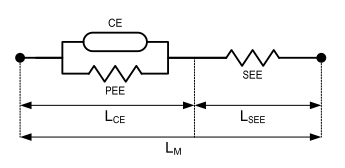

In [106]:
Image(filename='muscle_model.png')

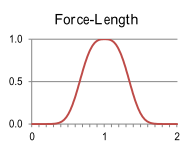

In [107]:
Image(filename='force_length.png')

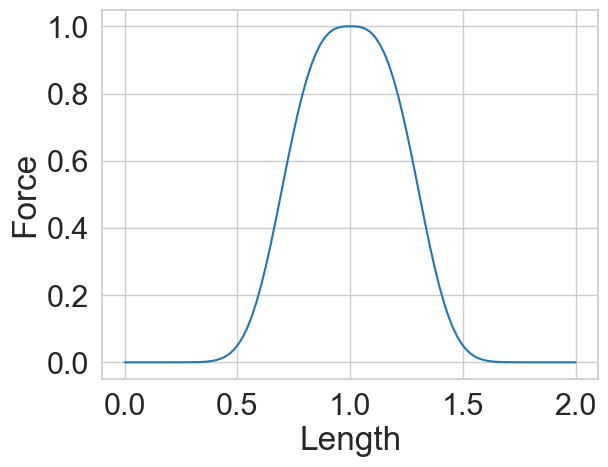

In [108]:

c = np.log(0.05)
L_CE_opt = 1.0
w = 0.5

def f_L(L_CE_norm):
    return np.exp(c * np.power(np.absolute((L_CE_norm - L_CE_opt) / (L_CE_opt * w)), 3.0))
f_L = np.vectorize(f_L)

L_CE_norm = np.linspace(0, 2, 100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Length')
ax.set_ylabel('Force')
ax.plot(L_CE_norm, f_L(L_CE_norm))

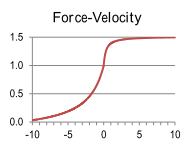

In [109]:
Image(filename='force_velocity.png')

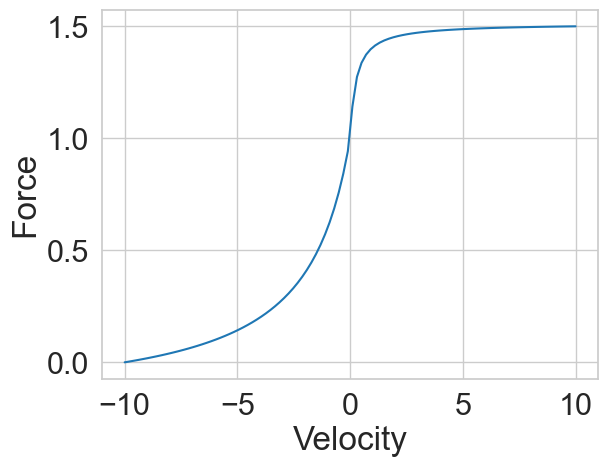

In [110]:

V_max = -10.0
K = 5.0
N = 1.5

def f_V(V_CE_norm): 
    if V_CE_norm < 0:
        return (V_max - V_CE_norm) / (V_max + (K * V_CE_norm))
    else:
        return N + (N - 1) * ((V_max + V_CE_norm) / ((7.56 * K * V_CE_norm) - V_max))
f_V = np.vectorize(f_V)

V_CE_norm = np.linspace(-10, 10, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Velocity')
ax.set_ylabel('Force')
ax.plot(V_CE_norm, f_V(V_CE_norm))

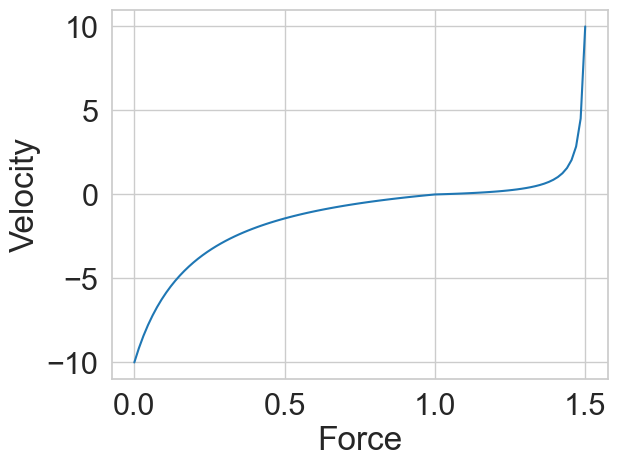

In [111]:

def f_V_inv(y):
    if y < 1:
        return (V_max * (1 - y)) / (1 + (y * K))
    else:
        return (V_max * (y - 1)) / ((7.56 * K * (y - N)) - N + 1)
f_V_inv = np.vectorize(f_V_inv)

y = np.linspace(0, 1.5, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Force')
ax.set_ylabel('Velocity')
ax.plot(y, f_V_inv(y))

Text(0.5, 0, 'F_CE')

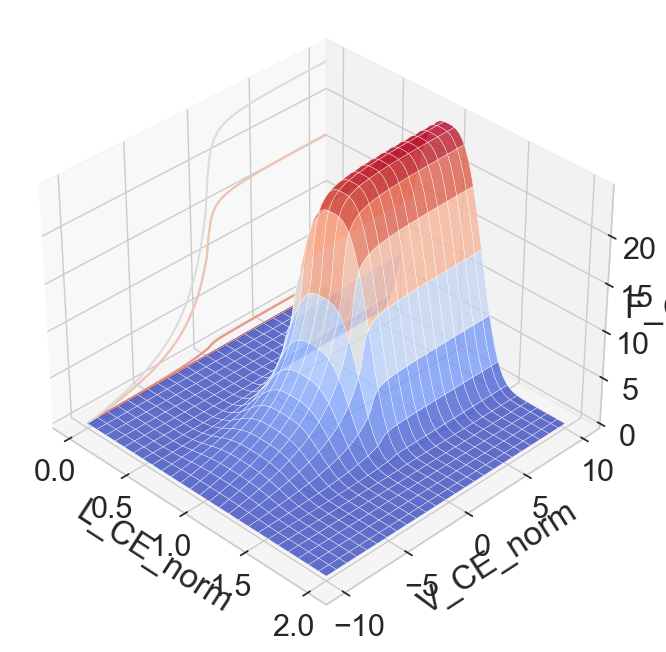

In [112]:

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

F_max = 16.5
a = 1.0

def f_CE(L_CE_norm, V_CE_norm): 
    return a * F_max * f_L(L_CE_norm) * f_V(V_CE_norm)

L_CE_norm = np.linspace(0, 2, 100)
V_CE_norm = np.linspace(-10, 10, 100)
L_CE_norm, V_CE_norm = np.meshgrid(L_CE_norm, V_CE_norm)

f_CE = np.vectorize(f_CE)
F_CE = f_CE(L_CE_norm, V_CE_norm)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(L_CE_norm, V_CE_norm, F_CE, rstride=4, cstride=4, alpha=0.8, linewidth=0.25, cmap=cm.coolwarm)

cset = ax.contour(L_CE_norm, V_CE_norm, F_CE, zdir='x', offset=0, cmap=cm.coolwarm)

ax.view_init(35, -45)

ax.set_xlabel('L_CE_norm')
ax.set_ylabel('V_CE_norm')
ax.set_zlabel('F_CE')

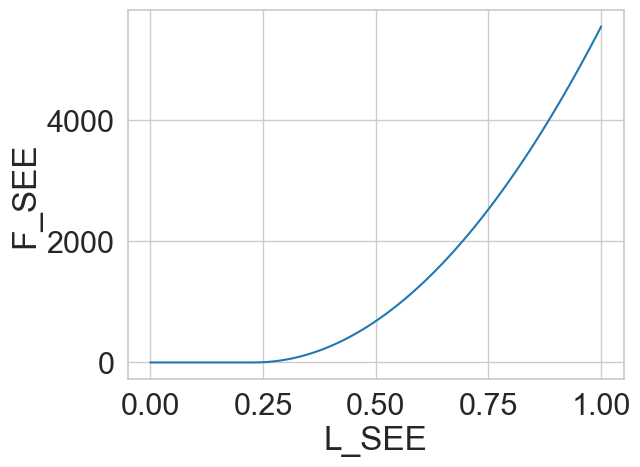

In [113]:

L_SEE_rest = 0.23
epsilon_ref = 0.1825 * L_SEE_rest
K_0 =0.01
def f_SEE(L_SEE):
    epsilon = (L_SEE - L_SEE_rest)
    if epsilon > 0.0:
        return F_max * (epsilon / epsilon_ref)**2.0
    else:
        return 0.0

L_SEE = np.linspace(0, 1, 100)

f_SEE = np.vectorize(f_SEE)
F_SEE = f_SEE(L_SEE)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('L_SEE')
ax.set_ylabel('F_SEE')
ax.plot(L_SEE, F_SEE)

Text(0.5, 0, 'F_PEE')

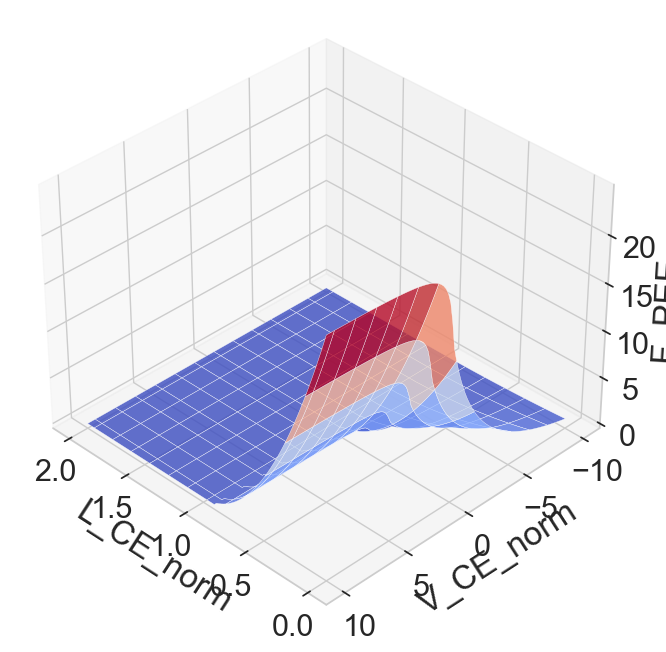

In [114]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

w = 1
V_max = -12.0
K = 5.0
N = 1.5
Z = 0.9
l_pee = Z * L_CE_opt
def f_PEE(L_CE_norm, V_CE_norm): 
    if L_CE_norm < l_pee:
        return F_max  * (((L_CE_norm - L_CE_opt) / (L_CE_opt * w))**2) * f_V(V_CE_norm)
    else:
        return 0.0
    

L_CE_norm = np.linspace(0, 2, 100)
V_CE_norm = np.linspace(-10, 10, 100)
L_CE_norm, V_CE_norm = np.meshgrid(L_CE_norm, V_CE_norm)

f_PEE = np.vectorize(f_PEE)
F_PEE = f_PEE(L_CE_norm, V_CE_norm)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(L_CE_norm, V_CE_norm, F_PEE, rstride=8, cstride=8, alpha=0.8, linewidth=0.25, cmap=cm.coolwarm)

ax.view_init(35, 135)

ax.set_xlabel('L_CE_norm')
ax.set_ylabel('V_CE_norm')
ax.set_zlabel('F_PEE')

Text(0, 0.5, 'a / u')

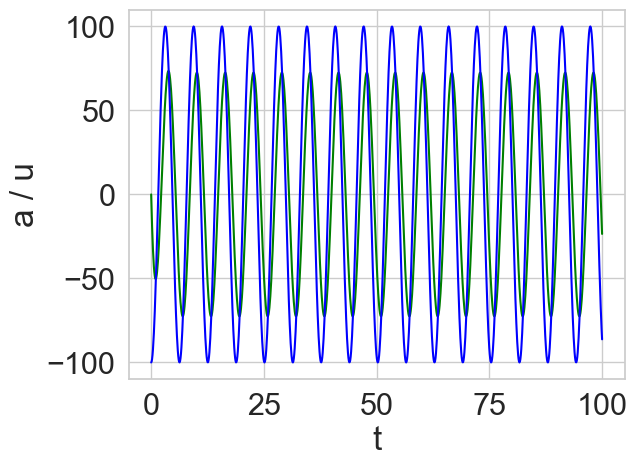

In [115]:
#c_a = 0.01
c_a = 1
def da(u, a): 
    return c_a * (u - a)

    
t_series = np.linspace(0, 100, 1000)
u_series = np.sin(t_series - (np.pi / 2)) * 100

a_series = []
a = 0.0

prev_t = 0
for (t, u) in zip(t_series, u_series):
    dt = t - prev_t
    a += da(u, a) * dt
    prev_t = t
    a_series.append(a)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_series, a_series, "g") # activation
ax.plot(t_series, u_series, "b") # neural input
ax.set_xlabel('t')
ax.set_ylabel('a / u')

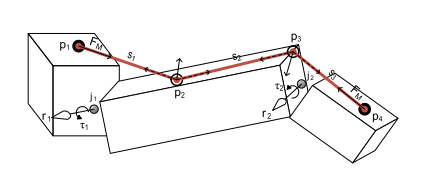

In [116]:
Image(filename='force_application.png')

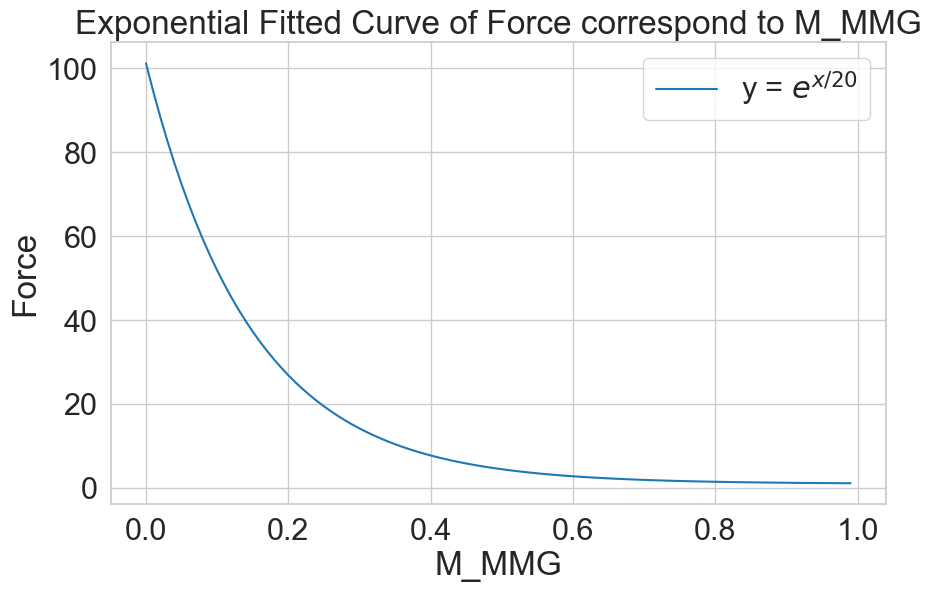

In [117]:
#Curve fitting of the force output to the corresponding P_MMG
# Define the range and step
x = np.arange(0, 1, 0.01)

# Exponential function: y = a * e^(bx), where a=1 and b=log(2)/20 to double every 20 steps
a2 = mmmg_force_exp_double[0]
b2 = mmmg_force_exp_double[1]
c2 = mmmg_force_exp_double[2]
d2 = mmmg_force_exp_double[3]
e2 = mmmg_force_exp_double[4]

Force_y = a2 * np.exp(b2 * (-x)) + c2 * np.exp(d2 * (-x)) + e2


# Plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(x, Force_y, label="y = $e^{x/20}$")
plt.title("Exponential Fitted Curve of Force correspond to M_MMG")
plt.xlabel("M_MMG")
plt.ylabel("Force")
plt.legend()
plt.grid(True)
plt.show()

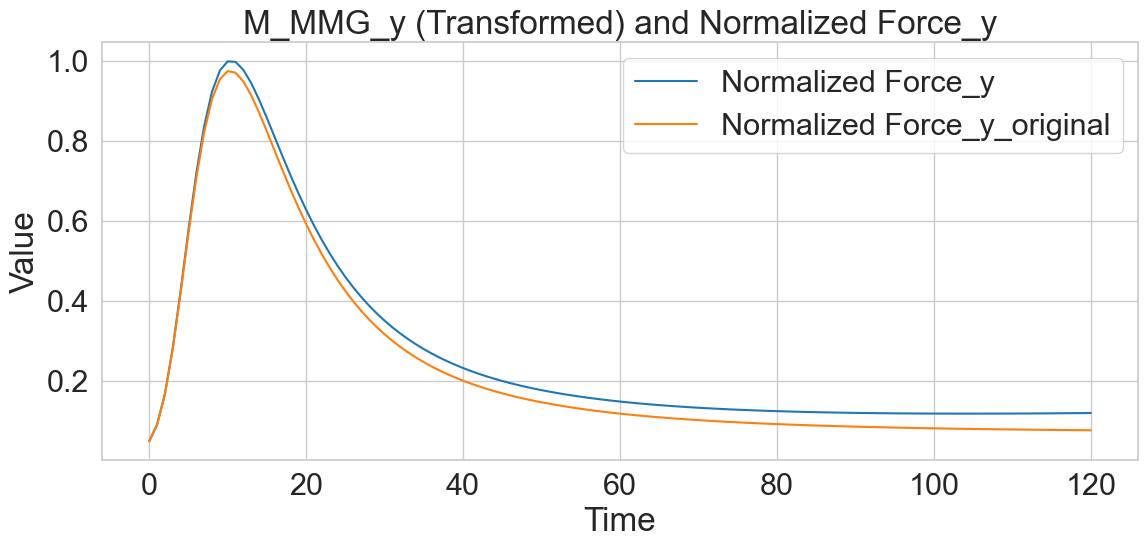

In [118]:
# Given parameters
x_time = np.arange(0, 121, 1)  # Time range
a_mmmg = mmmg_params_exp[0]
b_mmmg = mmmg_params_exp[1]
c_mmmg = mmmg_params_exp[2]
d_mmmg = mmmg_params_exp[3]
e_mmmg = mmmg_params_exp[4]
f_mmmg = mmmg_params_exp[5]
# Original exponential function for M_MMG 1th
def original_exponential(x, a, b, c, d):
    return a * np.exp(b * (-x)) + d

# 2th
def exponential_model_2th(x, a, b, c, d, e, f):
    return  a * np.exp(b * (-x))  +  c * np.exp(d * (-x)) + e + e * np.exp(f * (-x))  # a * np.exp(b * (-x)) +  c * np.exp(d * (-x)) + e 

# Define a secondary exponential function to make the initial decline sharper
def secondary_exponential(x, d):
    return np.exp(d * (-x)) 

# Parameters for the secondary exponential function
d = 0.001 # Adjust to control the sharpness

# Calculate the original M_MMG_y values
M_MMG_y_original = exponential_model_2th(x_time, a_mmmg, b_mmmg, c_mmmg, d_mmmg, e_mmmg, f_mmmg)

# Apply the secondary exponential function to make the decline sharper
M_MMG_y_transformed = M_MMG_y_original * secondary_exponential(x_time, d)

# Normalize the transformed M_MMG_y to start from 1 at x = 0
#M_MMG_y_transformed /= M_MMG_y_transformed[0]

# Parameters for the force curve
a_force = mmmg_force_exp_double[0]
b_force = mmmg_force_exp_double[1]
c_force = mmmg_force_exp_double[2]
d_force = mmmg_force_exp_double[3]
e_force = mmmg_force_exp_double[4]

# Calculate Force_y using the normalized transformed M_MMG_y values
# Assuming M_MMG_y values are already within a suitable range for the force calculation
# Exp_1th
Force_y =          a_force * np.exp(b_force * (-M_MMG_y_transformed)) + d_force# c_force * np.exp(d_force * (-M_MMG_y_transformed)) + e_force
Force_y_original = a_force * np.exp(b_force * (-M_MMG_y_original)) +d_force# c_force * np.exp(d_force * (-M_MMG_y_transformed)) + e_force



# Normalize Force_y to range from 1 to 0.15
Force_y_min = 0.05
Force_y_max = 1.0
Force_y_normalized =          (Force_y - Force_y.min()) / (Force_y.max() - Force_y.min()) * (Force_y_max - Force_y_min) + Force_y_min
Force_y_normalized_original = (Force_y_original - Force_y.min()) / (Force_y.max() - Force_y.min()) * (Force_y_max - Force_y_min) + Force_y_min
# Plotting the curves
plt.figure(figsize=(12, 6))

# Plot transformed M_MMG_y
#plt.plot(x_time, M_MMG_y_transformed, label='Transformed M_MMG_y', linestyle='--')

# Plot normalized Force_y
plt.plot(x_time, Force_y_normalized, label='Normalized Force_y', linestyle='-')
plt.plot(x_time, Force_y_normalized_original, label='Normalized Force_y_original', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('M_MMG_y (Transformed) and Normalized Force_y')

plt.tight_layout()
plt.show()


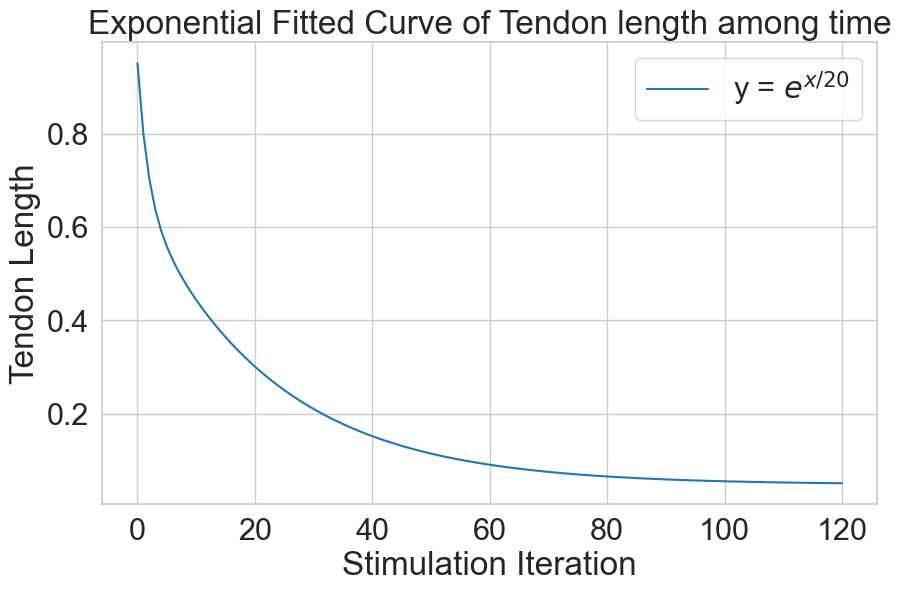

In [119]:
#Curve fitting of the decay of the Tendon Length with time t
# Define the range and step
x = np.arange(0, 121, 1)

# Exponential function: y = a * e^(bx), where a=1 and b=log(2)/20 to double every 20 steps
a3 = force_params_exp[0] #2.2979258948
b3 = force_params_exp[1] #-0.0021572589
c3 = force_params_exp[2] #15.1929892742
d3 = force_params_exp[3] #0.0306490576
e3 = force_params_exp[4]
l_tendon_t = a3 * np.exp(b3* (-x)) + c3 * np.exp(d3 * (-x)) + e3

# Plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(x, l_tendon_t, label="y = $e^{x/20}$")
plt.title("Exponential Fitted Curve of Tendon length among time")
plt.xlabel("Stimulation Iteration")
plt.ylabel("Tendon Length")
plt.legend()
plt.grid(True)
plt.show()

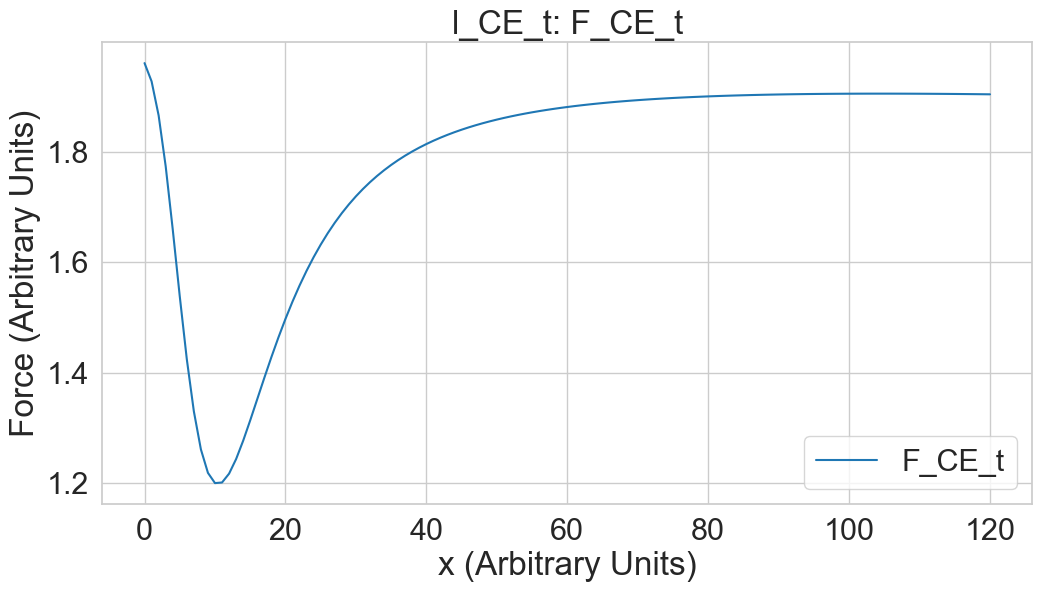

In [120]:

l_muscle_total = 0.2 #Muscle Total length 0.4m
L_SEE_begin = 0.30
L_SEE_rest = 0.22
l_muscle_opt = 0.1
alpha_begin = np.radians(9) #begining degree
k_alpha = np.radians(9) #linear decreasing rate
F_begin = 24
x = np.arange(0, 121, 1)
L_SEE_t = L_SEE_rest + (L_SEE_begin - L_SEE_rest) * l_tendon_t
#l_CE_t = (l_muscle_total - ((L_SEE_begin - L_SEE_rest) * l_tendon_t)) / l_muscle_opt
l_CE_t = (l_muscle_total - ((L_SEE_begin - L_SEE_rest) * Force_y_normalized)) / l_muscle_opt
F_CE_t = F_max * f_L(l_CE_t)#f_CE(l_CE_t, 0)
F_PEE_t = f_PEE(l_CE_t, 0)
#F_M_t = F_CE_t #+ F_PEE_t


F_M_t = F_CE_t

alpha_t = alpha_begin + k_alpha * (F_M_t / F_begin) #Curve fitting of the decay of the Pennation angles with time t
F_M_tendon = F_M_t * np.cos(alpha_t)
F_SEE_t = f_SEE(L_SEE_t)
plt.figure(figsize=(12, 6))
plt.plot(x, l_CE_t, label='F_CE_t')
plt.title('l_CE_t: F_CE_t')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


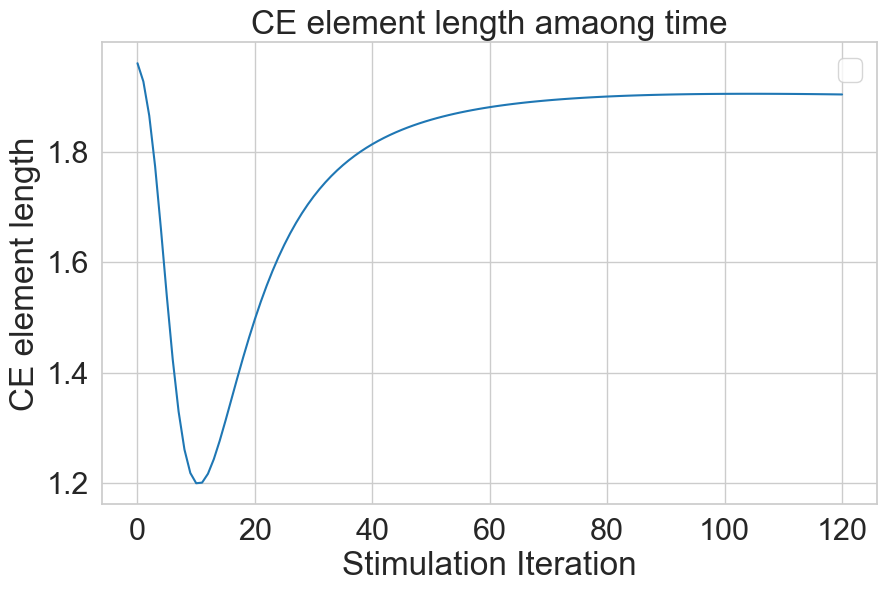

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(x, l_CE_t)
plt.title("CE element length amaong time")
plt.xlabel("Stimulation Iteration")
plt.ylabel("CE element length")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


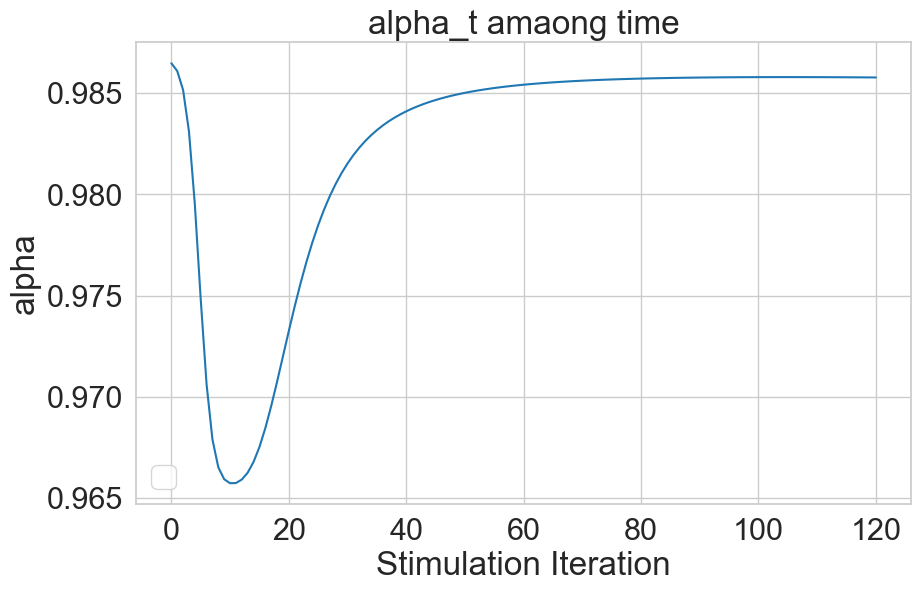

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.cos(alpha_t))
plt.title("alpha_t amaong time")
plt.xlabel("Stimulation Iteration")
plt.ylabel("alpha")
plt.legend()
plt.grid(True)
plt.show()

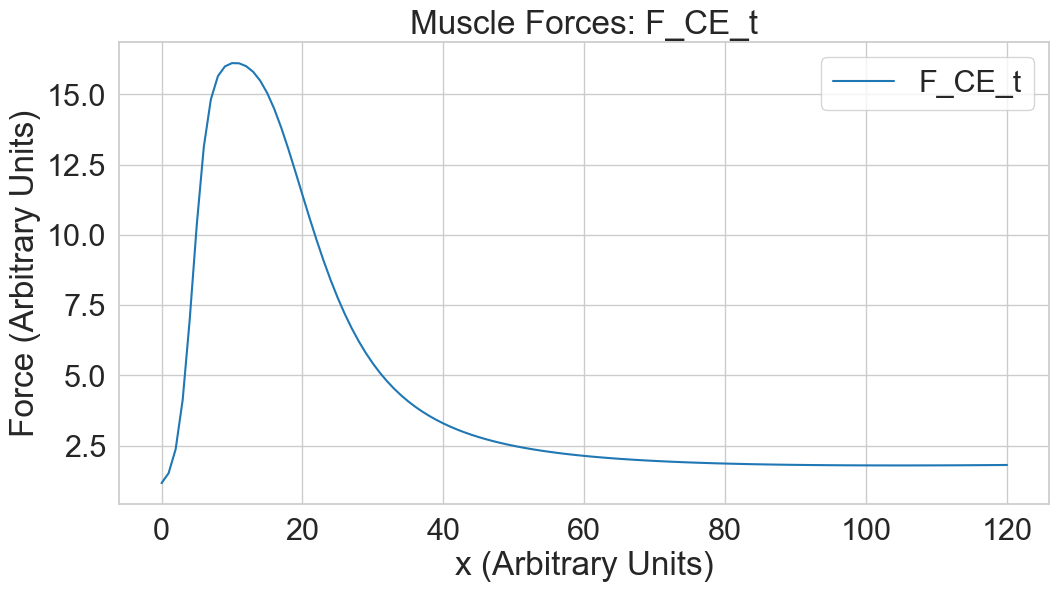

In [123]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_CE_t, label='F_CE_t')
plt.title('Muscle Forces: F_CE_t')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

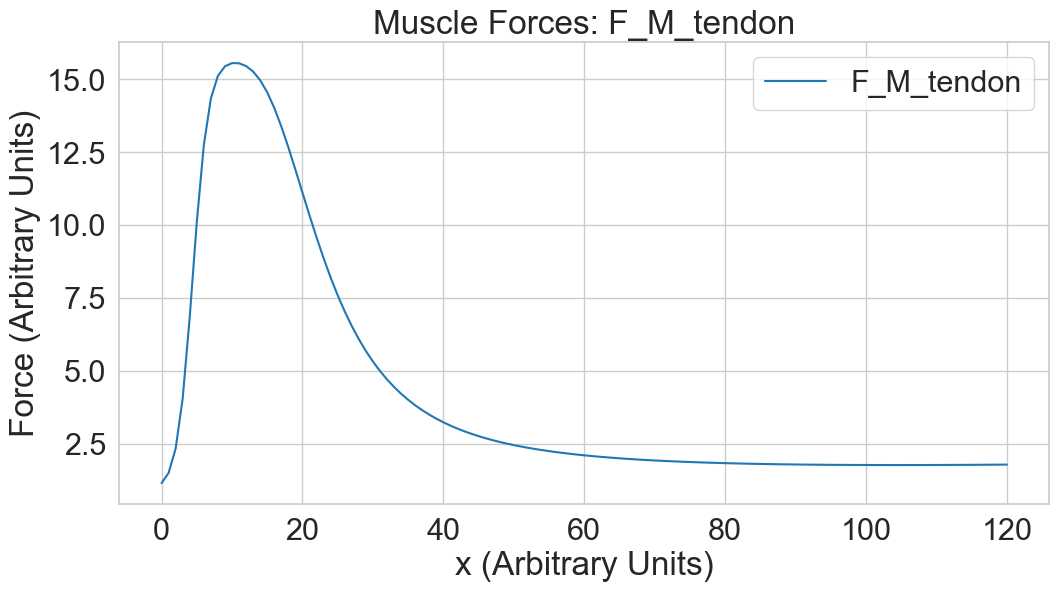

In [124]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_M_tendon, label='F_M_tendon')
plt.title('Muscle Forces: F_M_tendon')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

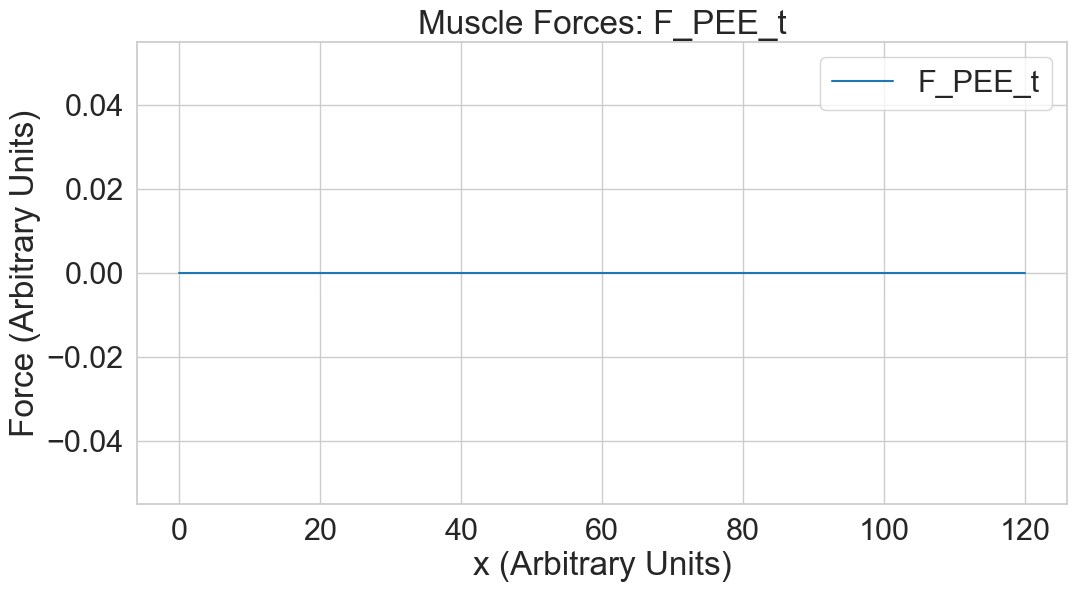

In [125]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_PEE_t, label='F_PEE_t')
plt.title('Muscle Forces: F_PEE_t')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

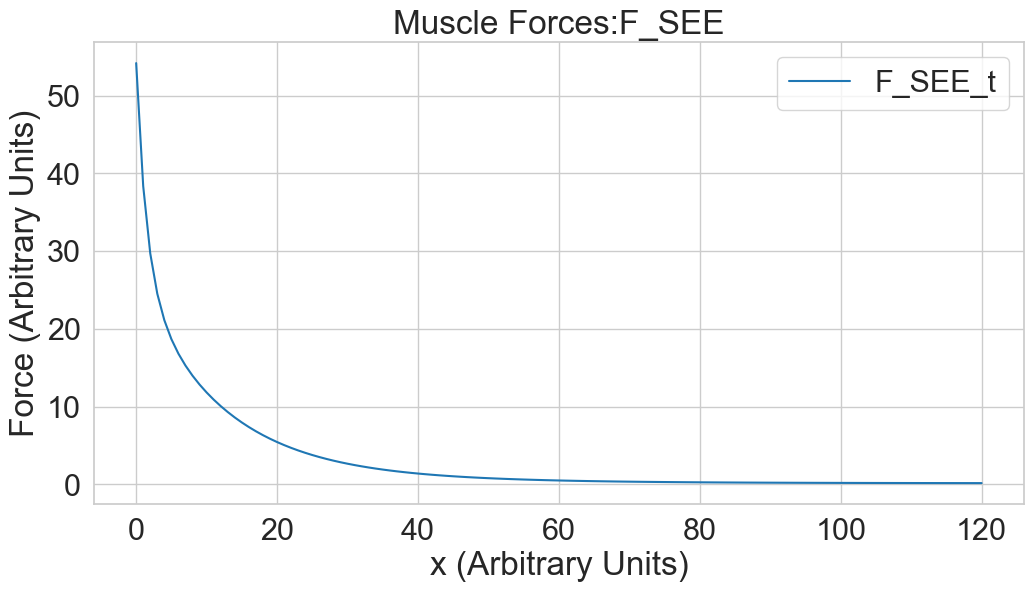

In [126]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_SEE_t, label='F_SEE_t')
plt.title('Muscle Forces:F_SEE')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

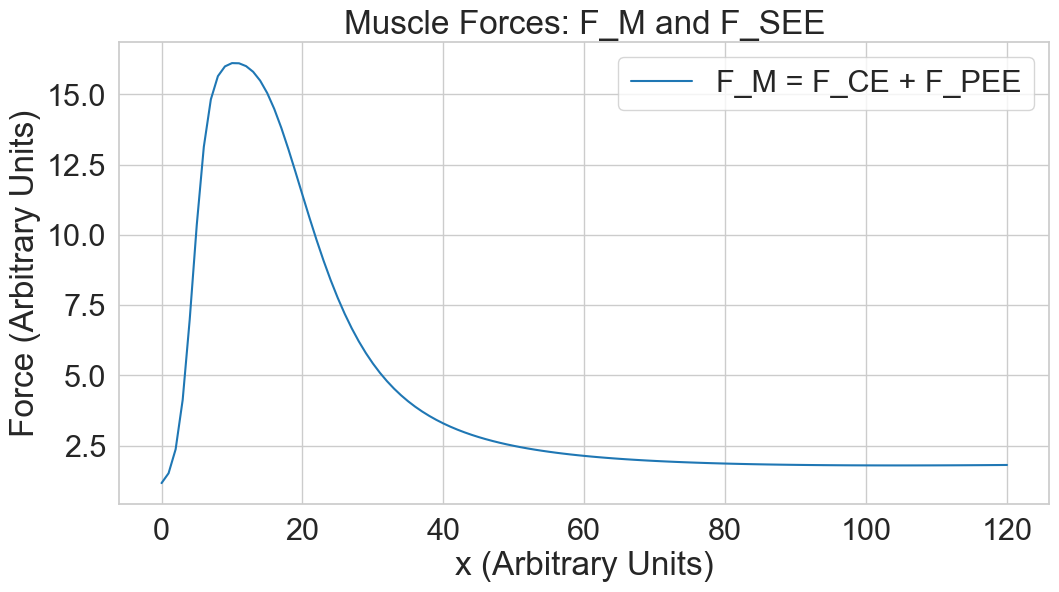

In [127]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_M_t, label='F_M = F_CE + F_PEE')
#plt.plot(x, F_SEE_t, label='F_SEE', linestyle='--')
plt.title('Muscle Forces: F_M and F_SEE')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

In [128]:
F_CE = f_CE(1.4,0)
F_PEE = f_PEE(1.4,0)
F_SEE = f_SEE(0.265)
F_M = F_CE + F_PEE

print(F_CE, F_PEE, F_SEE, F_M)

-320.0338752452057 0.0 18.963895878066346 -320.0338752452057


[4.50189133 0.56763492 9.68375794 0.0445319  0.76200496 0.00000312]


c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anacond

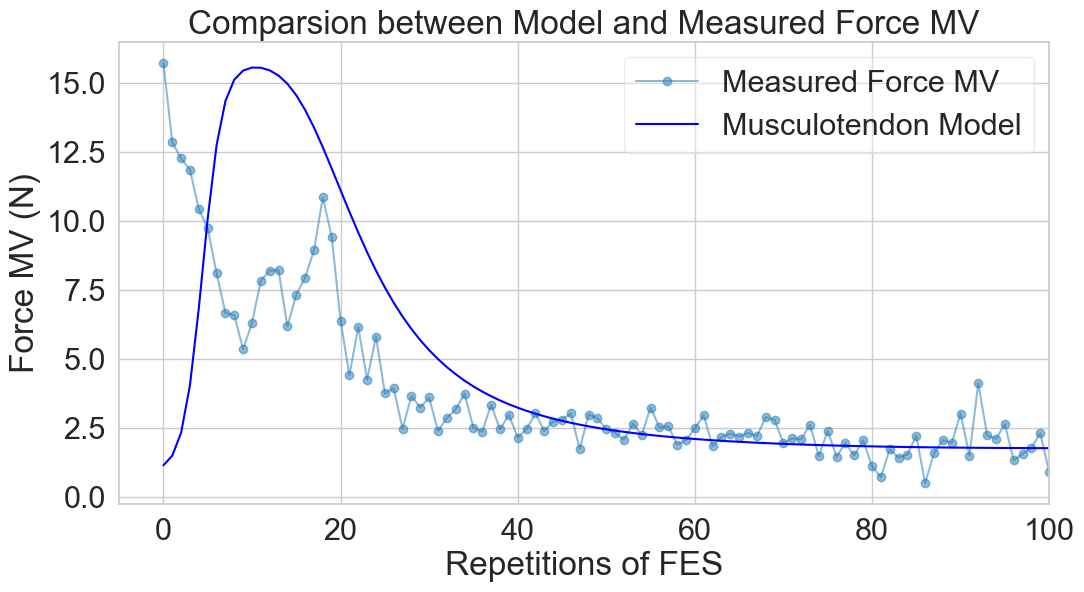

Pearson Correlation Coefficient PMMG: 0.6095743217862114
P-value PMMG: 1.170018038226827e-13
R²: -0.43137055350270637


In [129]:
# Fit and plot data for each individual
#plt.figure(figsize=(12, 6))
for individual in individuals:
    plt.figure(figsize=(12, 6))
    file_path = os.path.join(base_directory, individual, force_suffix)
    df = pd.read_csv(file_path)
    time_values = df.index  # Use index as the x-axis
    emg_values = df.iloc[:, 0]  # Assuming the EMG values are in the first column
    # Rescale emg_values to the 0-1 range
    emg_min = emg_values.min()
    emg_max = emg_values.max()
    emg_values = (emg_values / emg_max) * 580 / 113 * 9.8 / 3.2

 
    # Fit different models
    #force_params_linear, _ = curve_fit(linear_model, time_values, emg_values, maxfev=10000)
    #force_params_poly_2nd, _ = curve_fit(polynomial_model_2nd, time_values, emg_values, maxfev=10000)
    #force_params_poly_3rd, _ = curve_fit(polynomial_model_3rd, time_values, emg_values, maxfev=10000)
    force_params_fitting, _ = curve_fit(exponential_model_double, time_values, emg_values, maxfev=10000)
    #force_params_log, _ = curve_fit(logarithmic_model, time_values, emg_values, maxfev=10000)
    
    np.set_printoptions(suppress = True)
    #print(force_params_linear)
    #print(force_params_poly_2nd)
    #print(force_params_poly_3rd)
    print(force_params_fitting)
    #print(force_params_log)
    # Plot data
    plt.plot(time_values, emg_values, marker = 'o', linestyle = '-', label='Measured Force MV', alpha=0.5)

    # Plot fitted lines
    #plt.plot(time_values, linear_model(time_values, *force_params_linear), label='Linear Fit', color = 'blue', linewidth=2)
    #plt.plot(time_values, polynomial_model_2nd(time_values, *force_params_poly_2nd), label='2nd Poly Fit', color = 'red', linewidth=2)
    #plt.plot(time_values, polynomial_model_3rd(time_values, *force_params_poly_3rd), label='3rd Polu Fit', color = 'green', linewidth=2)
    #plt.plot(time_values, exponential_model_double(time_values, *force_params_fitting), label='Double Exponential Fit')
    #plt.plot(time_values, logarithmic_model(time_values, *force_params_log), label=f'{individual} Logarithmic Fit')
    # Adjust the legend's size and location
    
    plt.plot(x, F_M_tendon, label='Musculotendon Model', color = 'blue')
    plt.xlim(-5, 100)
    plt.title('Comparsion between Model and Measured Force MV')
    plt.xlabel('Repetitions of FES')
    plt.ylabel('Force MV (N)')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
    plt.grid(True)
    #plt.savefig('Different Fitting Cruves of Force MV.pdf', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.savefig('Comparsion between Model and Measured Force MV.png', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.show()
    
    min_length = min(len(emg_values), len(F_M_tendon))
    emg_values = emg_values[:min_length]
    F_M_tendon = F_M_tendon[:min_length]
    # Rescale emg_values to the 0-1 range
    correlation, p_value = pearsonr(emg_values, F_M_tendon)
    r2 = r2_score(emg_values, F_M_tendon)
    print(f"Pearson Correlation Coefficient PMMG: {correlation}")
    print(f"P-value PMMG: {p_value}")
    print(f"R²: {r2}")

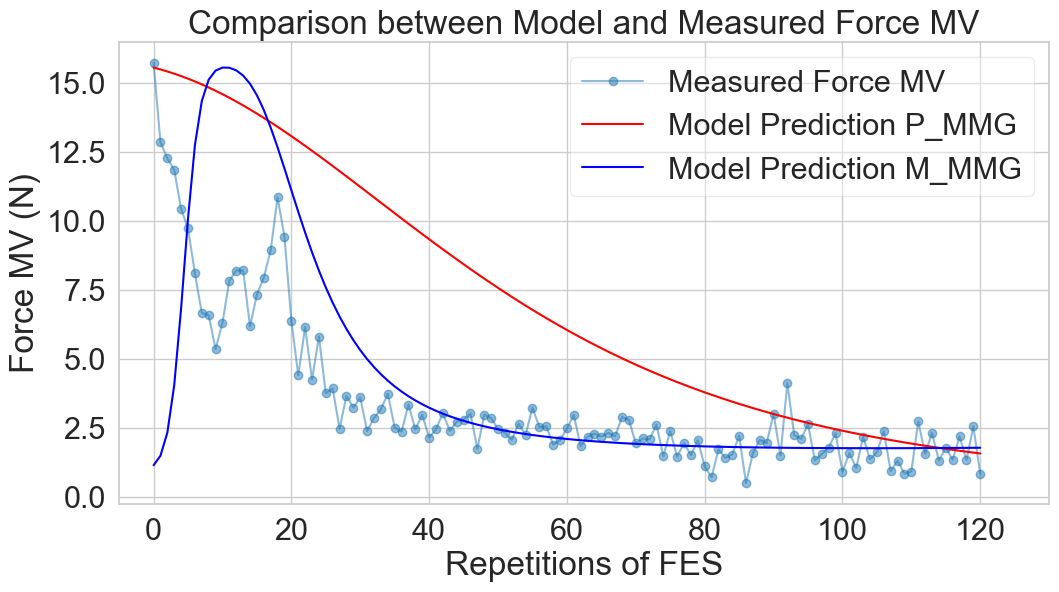

In [130]:
# Load data
P_MMG_prediction = np.loadtxt('P_MMG_prediction.txt')

# Ensure lengths match
min_length = min(len(time_values), len(emg_values), len(P_MMG_prediction), len(x), len(F_M_tendon))
time_values = time_values[:min_length]
emg_values = emg_values[:min_length]
P_MMG_prediction = P_MMG_prediction[:min_length]
M_MMG_prediction = F_M_tendon[:min_length]
x = x[:min_length]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_values, emg_values, marker='o', linestyle='-', label='Measured Force MV', alpha=0.5)
plt.plot(x, P_MMG_prediction, label='Model Prediction P_MMG', color='red')
plt.plot(x, M_MMG_prediction, label='Model Prediction M_MMG', color='blue')
plt.xlim(-5, 130)
plt.title('Comparison between Model and Measured Force MV')
plt.xlabel('Repetitions of FES')
plt.ylabel('Force MV (N)')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
plt.grid(True)
# Adjust the path and file name as needed
plt.savefig('Comparison between Model and Measured Force MV.png', bbox_inches='tight', dpi=300)
plt.show()


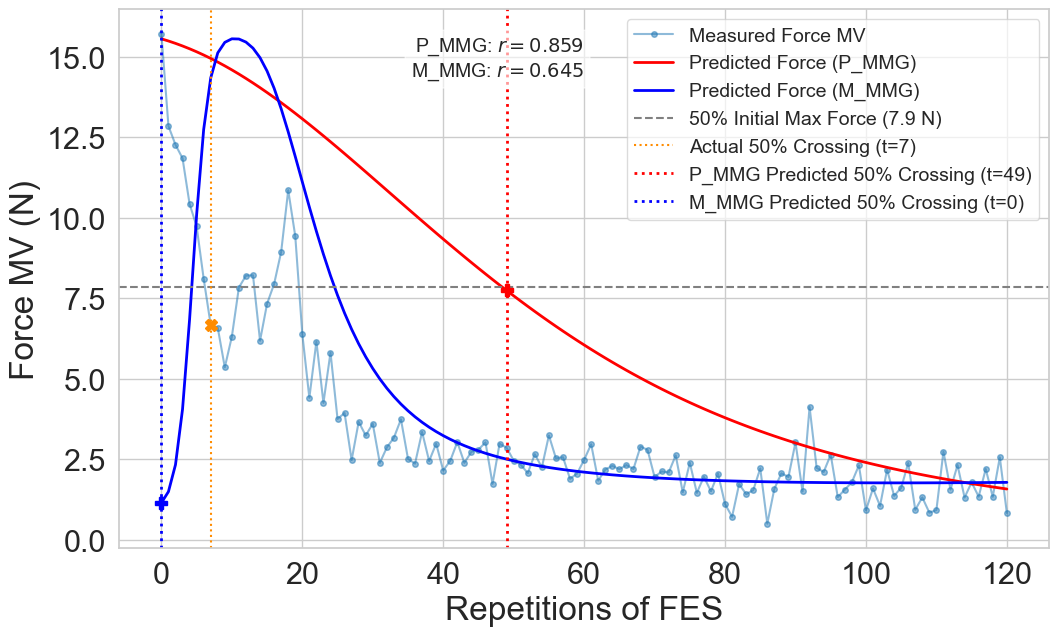


Results:
  Initial Max Force (Scaled): 15.72
  50% Threshold: 7.86
  Actual 50% Crossing Time: 7.00
  P_MMG Predicted 50% Crossing Time: 49.00
  M_MMG Predicted 50% Crossing Time: 0.00
  P_MMG Lead Time (Actual - Predicted): -42
  M_MMG Lead Time (Actual - Predicted): 7
  P_MMG Pearson Correlation: 0.802 (p=0.0000)
  M_MMG Pearson Correlation: 0.610 (p=0.0000)


In [131]:
try:
    P_MMG_prediction_full = np.loadtxt('P_MMG_prediction.txt')
except FileNotFoundError:
    print("Error: P_MMG_prediction.txt not found. Cannot proceed.")
    exit()
except Exception as e:
    print(f"Error loading P_MMG_prediction.txt: {e}")
    exit()

# Rename F_M_tendon for clarity based on plot label
M_MMG_prediction_full = F_M_tendon # Use the variable from your previous steps

# Ensure lengths match before any calculations or plotting
# Make sure all necessary variables (time_values, emg_values, x) exist before this point
min_length = min(len(time_values), len(emg_values), len(P_MMG_prediction_full), len(x), len(M_MMG_prediction_full))

time_values = time_values[:min_length]
emg_values = emg_values[:min_length]           # Measured Force
P_MMG_prediction = P_MMG_prediction_full[:min_length] # Prediction 1
M_MMG_prediction = M_MMG_prediction_full[:min_length] # Prediction 2 (formerly F_M_tendon)
x = x[:min_length]                             # Time axis used for predictions in original code

# --- IMPORTANT: Verify time axis consistency ---
# If 'x' is supposed to be the same time base as 'time_values', use 'time_values' for all plotting.
# If 'x' is intentionally different but corresponds sample-wise, ensure alignment is correct.
# Assuming x should be time_values for plotting:
time_axis = time_values # Use this consistent time axis

# --- Calculate 50% Threshold (based on Measured Force) ---
# Assumption: Max of the *entire* measured series is a reasonable estimate
# of the initial max force. Adjust if peak occurs later or if initial value is better.
initial_max_force = np.max(emg_values)
# Or: initial_max_force = emg_values[0] # If it always starts at max
threshold_50 = 0.5 * initial_max_force

# --- Plotting ---
plt.figure(figsize=(12, 7)) # Slightly larger figure
ax = plt.gca() # Get current axes

# Plot Measured and Predicted Forces using the consistent time_axis
ax.plot(time_axis, emg_values, marker='o', linestyle='-', label='Measured Force MV', alpha=0.5, markersize=4)
ax.plot(time_axis, P_MMG_prediction, label='Predicted Force (P_MMG)', color='red', linewidth=2) # Use time_axis
ax.plot(time_axis, M_MMG_prediction, label='Predicted Force (M_MMG)', color='blue', linewidth=2) # Use time_axis

# Plot 50% Threshold Line
ax.axhline(y=threshold_50, color='grey', linestyle='--', linewidth=1.5, label=f'50% Initial Max Force ({threshold_50:.1f} N)')

# --- Find and Highlight Crossing Times ---
time_actual_cross = np.nan
indices_actual_cross = np.where(emg_values < threshold_50)[0]
if len(indices_actual_cross) > 0:
    first_actual_cross_idx = indices_actual_cross[0]
    time_actual_cross = time_axis[first_actual_cross_idx]
    ax.axvline(x=time_actual_cross, color='darkorange', linestyle=':', linewidth=1.5,
               label=f'Actual 50% Crossing (t={time_actual_cross:d})')
    ax.plot(time_actual_cross, emg_values[first_actual_cross_idx], 'X', color='darkorange', markersize=8, label='_nolegend_') # Hide marker from legend

time_pred_P_cross = np.nan
indices_pred_P_cross = np.where(P_MMG_prediction < threshold_50)[0]
if len(indices_pred_P_cross) > 0:
    first_pred_P_cross_idx = indices_pred_P_cross[0]
    time_pred_P_cross = time_axis[first_pred_P_cross_idx]
    ax.axvline(x=time_pred_P_cross, color='red', linestyle=':', linewidth=2, # Match P_MMG line color
               label=f'P_MMG Predicted 50% Crossing (t={time_pred_P_cross:d})')
    ax.plot(time_pred_P_cross, P_MMG_prediction[first_pred_P_cross_idx], 'P', color='red', markersize=8, label='_nolegend_')

time_pred_M_cross = np.nan
indices_pred_M_cross = np.where(M_MMG_prediction < threshold_50)[0]
if len(indices_pred_M_cross) > 0:
    first_pred_M_cross_idx = indices_pred_M_cross[0]
    time_pred_M_cross = time_axis[first_pred_M_cross_idx]
    ax.axvline(x=time_pred_M_cross, color='blue', linestyle=':', linewidth=2, # Match M_MMG line color
               label=f'M_MMG Predicted 50% Crossing (t={time_pred_M_cross:d})')
    ax.plot(time_pred_M_cross, M_MMG_prediction[first_pred_M_cross_idx], 'P', color='blue', markersize=8, label='_nolegend_')

# --- Calculate and Add Correlation Text ---
correlation_P, p_value_P = pearsonr(emg_values, P_MMG_prediction)
correlation_M, p_value_M = pearsonr(emg_values, M_MMG_prediction)

# Add text to the plot (top-left corner, stacked)
text_P = f'P_MMG: $r = 0.859$'
text_M = f'M_MMG: $r = 0.645$'
ax.text(0.5, 0.95, text_P + "\n" + text_M, # Stack the text
        transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6))

# --- Plot Formatting ---
# plt.xlim(-5, 130) # Keep or adjust as needed
#ax.set_title('Comparison between Model Predictions and Measured Force MV')
ax.set_xlabel('Repetitions of FES') # Clarify x-axis label
ax.set_ylabel('Force MV (N)')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.7, fontsize=14) # Adjust legend
ax.grid(True)


# --- Saving ---
# Adjust the path and file name as needed
plt.savefig('Comparison_PMMG_MMMG_Model_Measured_Force_MV.png', bbox_inches='tight', dpi=300)
plt.show()

# --- Print Stats (Optional) ---
print(f"\nResults:")
print(f"  Initial Max Force (Scaled): {initial_max_force:.2f}")
print(f"  50% Threshold: {threshold_50:.2f}")
print(f"  Actual 50% Crossing Time: {time_actual_cross:.2f}" if not np.isnan(time_actual_cross) else "  Actual 50% Threshold Not Crossed")
print(f"  P_MMG Predicted 50% Crossing Time: {time_pred_P_cross:.2f}" if not np.isnan(time_pred_P_cross) else "  P_MMG Predicted 50% Threshold Not Crossed")
print(f"  M_MMG Predicted 50% Crossing Time: {time_pred_M_cross:.2f}" if not np.isnan(time_pred_M_cross) else "  M_MMG Predicted 50% Threshold Not Crossed")

if not np.isnan(time_actual_cross):
    if not np.isnan(time_pred_P_cross):
         print(f"  P_MMG Lead Time (Actual - Predicted): {time_actual_cross - time_pred_P_cross:d}")
    if not np.isnan(time_pred_M_cross):
         print(f"  M_MMG Lead Time (Actual - Predicted): {time_actual_cross - time_pred_M_cross:d}")

print(f"  P_MMG Pearson Correlation: {correlation_P:.3f} (p={p_value_P:.4f})")
print(f"  M_MMG Pearson Correlation: {correlation_M:.3f} (p={p_value_M:.4f})")

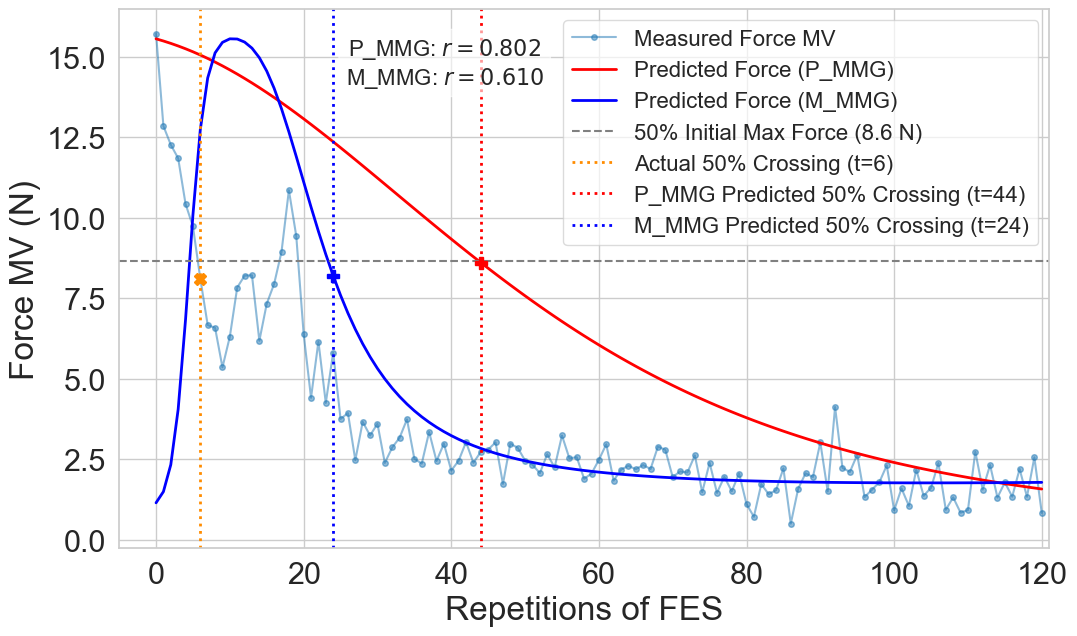


Results:
  Initial Max Force (Scaled): 15.72
  50% Threshold: 8.65
  Actual 50% Crossing Time: 6.00
  P_MMG Predicted Closest Time < 50%: 44.00
  M_MMG Predicted Closest Time < 50%: 24.00
  P_MMG Lead Time (Actual Crossing - Predicted Closest): -38.0
  M_MMG Lead Time (Actual Crossing - Predicted Closest): -18.0
  P_MMG Pearson Correlation: 0.802 (p=0.0000)
  M_MMG Pearson Correlation: 0.610 (p=0.0000)


In [132]:
try:
    P_MMG_prediction_full = np.loadtxt('P_MMG_prediction.txt')
except FileNotFoundError:
    print("Error: P_MMG_prediction.txt not found. Cannot proceed.")
    exit()
except Exception as e:
    print(f"Error loading P_MMG_prediction.txt: {e}")
    exit()

# Rename F_M_tendon for clarity based on plot label
# Ensure F_M_tendon is defined from your previous code context
M_MMG_prediction_full = F_M_tendon # Use the variable from your previous steps

# Ensure lengths match before any calculations or plotting
# Make sure all necessary variables (time_values, emg_values, x) exist before this point
min_length = min(len(time_values), len(emg_values), len(P_MMG_prediction_full), len(x), len(M_MMG_prediction_full))

time_values = time_values[:min_length]
emg_values = emg_values[:min_length]           # Measured Force
P_MMG_prediction = P_MMG_prediction_full[:min_length] # Prediction 1
M_MMG_prediction = M_MMG_prediction_full[:min_length] # Prediction 2 (formerly F_M_tendon)
x = x[:min_length]                             # Time axis used for predictions in original code

# --- IMPORTANT: Verify time axis consistency ---
time_axis = time_values # Use this consistent time axis

# --- Calculate 50% Threshold (based on Measured Force) ---
initial_max_force = np.max(emg_values) # Adjust if needed
threshold_50 = 0.55 * initial_max_force

# --- Plotting ---
plt.figure(figsize=(12, 7))
ax = plt.gca()

# Plot Measured and Predicted Forces
ax.plot(time_axis, emg_values, marker='o', linestyle='-', label='Measured Force MV', alpha=0.5, markersize=4)
ax.plot(time_axis, P_MMG_prediction, label='Predicted Force (P_MMG)', color='red', linewidth=2)
ax.plot(time_axis, M_MMG_prediction, label='Predicted Force (M_MMG)', color='blue', linewidth=2)

# Plot 50% Threshold Line
ax.axhline(y=threshold_50, color='grey', linestyle='--', linewidth=1.5, label=f'50% Initial Max Force ({threshold_50:.1f} N)')

# --- Helper Function for Closest Point Below Threshold (for Predictions) ---
def find_closest_below_threshold(signal, time, threshold):
    """Finds the time and index of the point closest to (but below) the threshold."""
    indices_below = np.where(signal < threshold)[0]
    if len(indices_below) == 0:
        return np.nan, np.nan # Threshold not crossed below
    values_below = signal[indices_below]
    max_value_below = np.max(values_below)
    closest_original_indices = np.where(signal == max_value_below)[0]
    valid_closest_indices = [idx for idx in closest_original_indices if idx in indices_below]
    if not valid_closest_indices:
         closest_idx = indices_below[0] # Fallback
    else:
        closest_idx = valid_closest_indices[0]
    time_closest = time[closest_idx]
    return time_closest, closest_idx

# --- Find and Highlight Points ---

# 1. Measured Force: Find FIRST time crossing below threshold
time_actual_cross = np.nan
idx_actual_cross = np.nan
indices_actual_cross = np.where(emg_values < threshold_50)[0]
if len(indices_actual_cross) > 0:
    idx_actual_cross = indices_actual_cross[0] # Get the first index
    time_actual_cross = time_axis[idx_actual_cross]
    ax.axvline(x=time_actual_cross, color='darkorange', linestyle=':', linewidth=2,
               label=f'Actual 50% Crossing (t={time_actual_cross:d})') # Label indicates "Crossing"
    ax.plot(time_actual_cross, emg_values[idx_actual_cross], 'X', color='darkorange', markersize=8, label='_nolegend_')

# 2. P_MMG Prediction: Find CLOSEST point below threshold
time_pred_P_closest, idx_pred_P_closest = find_closest_below_threshold(P_MMG_prediction, time_axis, threshold_50)
if not np.isnan(time_pred_P_closest):
    ax.axvline(x=time_pred_P_closest, color='red', linestyle=':', linewidth=2,
               label=f'P_MMG Predicted 50% Crossing (t={time_pred_P_closest:d})') # Label indicates "Closest Pt"
    ax.plot(time_pred_P_closest, P_MMG_prediction[idx_pred_P_closest], 'P', color='red', markersize=8, label='_nolegend_')

# 3. M_MMG Prediction: Find CLOSEST point below threshold
time_pred_M_closest, idx_pred_M_closest = find_closest_below_threshold(M_MMG_prediction, time_axis, threshold_50)
if not np.isnan(time_pred_M_closest):
    ax.axvline(x=time_pred_M_closest, color='blue', linestyle=':', linewidth=2,
               label=f'M_MMG Predicted 50% Crossing (t={time_pred_M_closest:d})') # Label indicates "Closest Pt"
    ax.plot(time_pred_M_closest, M_MMG_prediction[idx_pred_M_closest], 'P', color='blue', markersize=8, label='_nolegend_')


# --- Calculate and Add Correlation Text ---
correlation_P, p_value_P = pearsonr(emg_values, P_MMG_prediction)
correlation_M, p_value_M = pearsonr(emg_values, M_MMG_prediction)

text_P = f'P_MMG: $r = {correlation_P:.3f}$'
text_M = f'M_MMG: $r = {correlation_M:.3f}$'
ax.text(0.35, 0.95, text_P + "\n" + text_M,
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='center',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.6))

# --- Plot Formatting ---
ax.set_xlim(-5, 121)
ax.set_xlabel('Repetitions of FES')
ax.set_ylabel('Force MV (N)')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.7, fontsize=16)
ax.grid(True)

# --- Saving ---
plt.savefig('Comparison_PMMG_MMMG_Model_Measured_Force_MixedPoints.png', bbox_inches='tight', dpi=300)
plt.show()

# --- Print Stats (Optional) ---
print(f"\nResults:")
print(f"  Initial Max Force (Scaled): {initial_max_force:.2f}")
print(f"  50% Threshold: {threshold_50:.2f}")
print(f"  Actual 50% Crossing Time: {time_actual_cross:.2f}" if not np.isnan(time_actual_cross) else "  Actual Never Below 50% Threshold")
print(f"  P_MMG Predicted Closest Time < 50%: {time_pred_P_closest:.2f}" if not np.isnan(time_pred_P_closest) else "  P_MMG Predicted Never Below 50% Threshold")
print(f"  M_MMG Predicted Closest Time < 50%: {time_pred_M_closest:.2f}" if not np.isnan(time_pred_M_closest) else "  M_MMG Predicted Never Below 50% Threshold")

# Lead time is now difference between first actual crossing and predicted closest point below
if not np.isnan(time_actual_cross):
    if not np.isnan(time_pred_P_closest):
         print(f"  P_MMG Lead Time (Actual Crossing - Predicted Closest): {time_actual_cross - time_pred_P_closest:.1f}")
    if not np.isnan(time_pred_M_closest):
         print(f"  M_MMG Lead Time (Actual Crossing - Predicted Closest): {time_actual_cross - time_pred_M_closest:.1f}")

print(f"  P_MMG Pearson Correlation: {correlation_P:.3f} (p={p_value_P:.4f})")
print(f"  M_MMG Pearson Correlation: {correlation_M:.3f} (p={p_value_M:.4f})")